[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mGXCNLa1hkdcmcMnQz3tg8mqb_NkFOFe?usp=sharing)

## (Extra) Numpy tricks

Problem: implement 2x2 rolling window for given 2d array 

In [1]:
import numpy as np

x = np.arange(100).reshape(10, 10)
x.shape, x.strides

((10, 10), (80, 8))

Solution:

In [2]:
a2 = np.lib.stride_tricks.as_strided(x, shape=(9, 9, 2, 2), strides=(40, 4, 40, 4))

In [3]:
print(a2[0, 0])
print(a2[1, 1])

[[          0  4294967296]
 [          5 25769803776]]
[[25769803776           6]
 [47244640256          11]]


Usage: average 2d matrix over 2x2 windows:  

In [4]:
a2.mean(axis=(-2, -1))

array([[7.51619277e+09, 7.51619277e+09, 9.66367642e+09, 9.66367642e+09,
        1.18111601e+10, 1.18111601e+10, 1.39586437e+10, 1.39586437e+10,
        1.61061274e+10],
       [1.82536110e+10, 1.82536110e+10, 2.04010947e+10, 2.04010947e+10,
        2.25485783e+10, 2.25485783e+10, 2.46960620e+10, 2.46960620e+10,
        2.68435456e+10],
       [2.89910293e+10, 2.89910293e+10, 3.11385129e+10, 3.11385129e+10,
        3.32859966e+10, 3.32859966e+10, 3.54334802e+10, 3.54334802e+10,
        3.75809638e+10],
       [3.97284475e+10, 3.97284475e+10, 4.18759311e+10, 4.18759311e+10,
        4.40234148e+10, 4.40234148e+10, 4.61708984e+10, 4.61708984e+10,
        4.83183821e+10],
       [5.04658657e+10, 5.04658657e+10, 5.26133494e+10, 5.26133494e+10,
        5.47608330e+10, 5.47608330e+10, 5.69083167e+10, 5.69083167e+10,
        5.90558003e+10],
       [6.12032840e+10, 6.12032840e+10, 6.33507676e+10, 6.33507676e+10,
        6.54982513e+10, 6.54982513e+10, 6.76457349e+10, 6.76457349e+10,
        6.9

# Matplotlib

In [5]:
import matplotlib.pyplot as plt

### Basic charts

![](https://qph.fs.quoracdn.net/main-qimg-e649ba1703fef26b52964b58c7f7f2b3)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

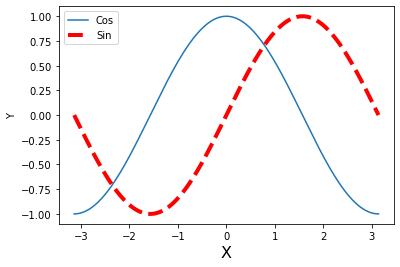

In [6]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.

In [7]:
url = 'http://scipy-lectures.org/_downloads/populations.txt'
data = np.loadtxt(url, delimiter='\t', dtype=object, skiprows=1)

data = data.astype('float')

In [8]:
Years = data[:, 0]
Hares = data[:, 1]
Lynxes = data[:, 2]
Carrot = data[:, 3]


Plot the populations for the years in the period. Add legend and axis labels to the plot.

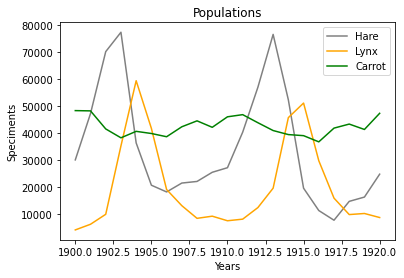

In [9]:
plt.plot(data[:, 0], data[:, 1], label = 'Hare', color = 'grey')
plt.plot(data[:, 0], data[:, 2], label = 'Lynx', color = 'orange')
plt.plot(data[:, 0], data[:, 3], label = 'Carrot', color = 'green')
plt.ylabel('Speciments')
plt.xlabel('Years')
plt.title('Populations')
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

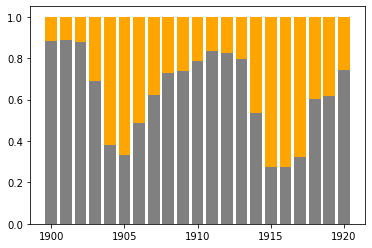

In [10]:
plt.bar(Years, Hares / (Hares + Lynxes), color = 'grey')
plt.bar(Years, Lynxes / (Hares + Lynxes), bottom = Hares / (Hares + Lynxes), color = 'orange')
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

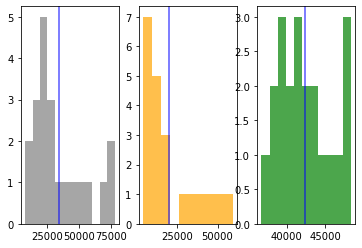

In [11]:
H_m = Hares.mean()
H_std = Hares.std()
L_m = Lynxes.mean()
L_std = Lynxes.std()
C_m = Carrot.mean()
C_std = Carrot.std()

fig, ax = plt.subplots(1, 3)

ax[0].hist(Hares, color = 'grey', alpha = 0.7, bins = 12)
ax[0].axvline(H_m, color='b', alpha = 0.5, linestyle='solid', linewidth = 2)
ax[1].hist(Lynxes, color = 'orange', alpha = 0.7)
ax[1].axvline(L_m, color='b', alpha = 0.5, linestyle='solid', linewidth = 2)
ax[2].hist(Carrot, color = 'green', alpha = 0.7, bins = 11)
ax[2].axvline(C_m, color='b', alpha = 0.5, linestyle='solid', linewidth = 2)

plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

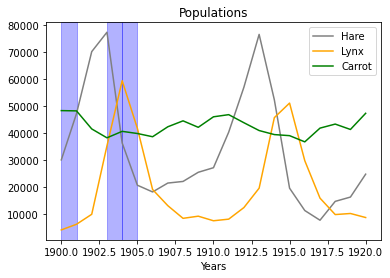

In [12]:
I = [np.argmax(Hares), np.argmax(Lynxes), np.argmax(Carrot)]

plt.plot(data[:, 0], data[:, 1], label = 'Hare', color = 'grey')
plt.plot(data[:, 0], data[:, 2], label = 'Lynx', color = 'orange')
plt.plot(data[:, 0], data[:, 3], label = 'Carrot', color = 'green')
for i in I:
    plt.axvspan(xmin = 1900 + i, xmax = 1900 + i + 1, color = 'blue', alpha = 0.3)
plt.xlabel('Years')
plt.title('Populations')
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

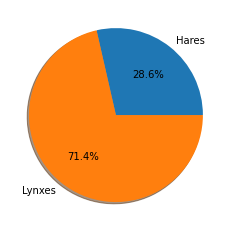

In [13]:
result = np.array(['H'] * len(data))
result[np.ix_(Hares - Lynxes > 0)] = 'L'
        
plt.pie([(result == 'H').sum(), (result == 'L').sum()],labels = ['Hares', 'Lynxes'], autopct='%1.1f%%', shadow = True)
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

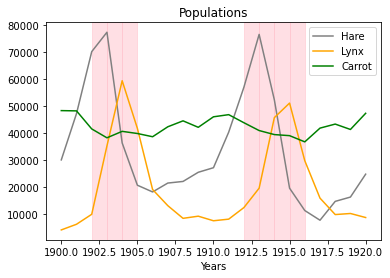

In [14]:
I = np.union1d(np.union1d(np.ix_(Hares > 50000), np.ix_(Lynxes > 50000)), np.ix_(Carrot > 50000))

plt.plot(data[:, 0], data[:, 1], label = 'Hare', color = 'grey')
plt.plot(data[:, 0], data[:, 2], label = 'Lynx', color = 'orange')
plt.plot(data[:, 0], data[:, 3], label = 'Carrot', color = 'green')
for i in I:
    plt.axvspan(xmin = 1900 + i, xmax = 1900 + i + 1, color = 'pink', alpha = 0.5)
plt.xlabel('Years')
plt.title('Populations')
plt.legend()
plt.show()

Find the top 2 years for each species when they had the lowest populations.

In [15]:
print('Hares:  ', np.argsort(Hares)[-2:] + 1900)
print('Lynxes: ', np.argsort(Lynxes)[-2:] + 1900)
print('Carrot: ', np.argsort(Carrot)[-2:] + 1900)

Hares:   [1913 1903]
Lynxes:  [1915 1904]
Carrot:  [1901 1900]


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

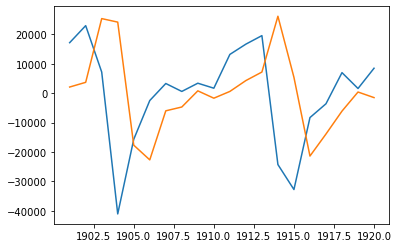

[[1.         0.07189206]
 [0.07189206 1.        ]]
[[1.        0.9273333]
 [0.9273333 1.       ]]


In [16]:
plt.plot(Years[1:], np.diff(Hares))
plt.plot(Years[1:], np.diff(Lynxes))
plt.show()

print(np.corrcoef((Hares), Lynxes))
print(np.corrcoef(Hares[:-2], Lynxes[2:]))

In [17]:
np.corrcoef(Hares[2:], Carrot[:-2])

array([[1.        , 0.88134634],
       [0.88134634, 1.        ]])

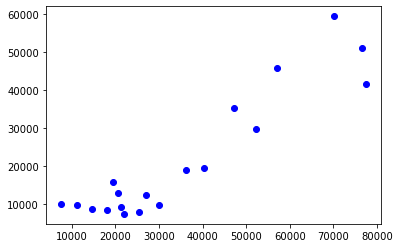

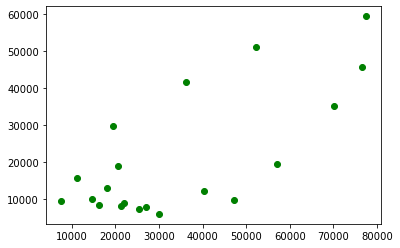

In [18]:
plt.scatter(Hares[:-2], Lynxes[2:], color = 'blue')
plt.show()
plt.scatter(Hares[:-1], Lynxes[1:], color = 'green')
plt.show()

Show population of hares vs carrots and hares vs lynxes.

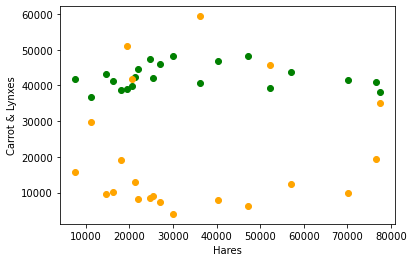

In [19]:
plt.scatter(Hares, Carrot, color = 'green')
plt.scatter(Hares, Lynxes, color = 'orange')
plt.xlabel('Hares')
plt.ylabel('Carrot & Lynxes')
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

One can noticed that there are correlations close to 1 between Hares[:-2] & Lynxes[2:] and Hares[2:] & Carrot[:-2]. 
Thus we can apply linear regression to this data. 

Ratio of the error to the true value:  -0.02408969571978195


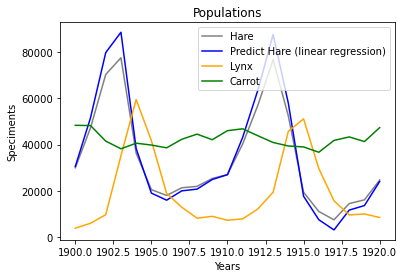

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Lynxes[2:].reshape((-1, 1)), Hares[:-2])
predicted_values = model.predict(Hares.reshape((-1, 1)))

print('Ratio of the error to the true value: ', (predicted_values[-1] - 15000 - Hares[-1]) / Hares[-1])

plt.plot(data[:, 0], data[:, 1], label = 'Hare', color = 'grey')
plt.plot(data[:, 0], predicted_values - 15000, label = 'Predict Hare (linear regression)', color = 'blue')
plt.plot(data[:, 0], data[:, 2], label = 'Lynx', color = 'orange')
plt.plot(data[:, 0], data[:, 3], label = 'Carrot', color = 'green')
plt.ylabel('Speciments')
plt.xlabel('Years')
plt.title('Populations')
plt.legend()
plt.show()

## High-dimentional data visualization

What is an image?

![img](https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg)

Basically, it is an array of numbers:

In [38]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
print(np.array(img).shape)
np.array(img)

(500, 750)


array([[145, 145, 144, ..., 142, 143, 144],
       [146, 146, 146, ..., 141, 143, 144],
       [146, 147, 146, ..., 140, 142, 143],
       ...,
       [114, 111, 120, ...,  78,  69,  56],
       [ 75,  83, 104, ...,  53,  51,  64],
       [ 63,  82, 108, ..., 101,  95,  94]], dtype=uint8)

What if we take a random point in a 500*750 dimentional space? Will it be a meaningful image?

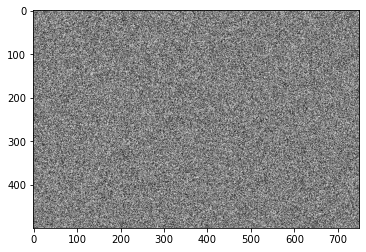

In [82]:
sample_img = np.random.choice(np.arange(256), size=500*750).reshape(500, 750)
plt.imshow(sample_img, cmap='gray')
plt.show()

Meaningful images are very rare subset (manifold?) in a space of all possible images. Can we explore a structure of this subset?

Get the MNIST dataset:

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [69]:
images = digits.data.reshape(-1, 8, 8)

Look at some items in the dataset:

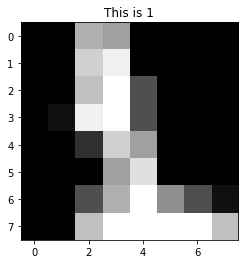

In [86]:
i = 987
plt.imshow(images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

Let's find a good projection plane for our data:

![img](https://i.stack.imgur.com/G7Gkv.png)

What is good actually?

![img](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

For detailed derivation of PCA look https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture7.pdf

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_transformed.shape

(1797, 10)

Variances along eigenvectors:

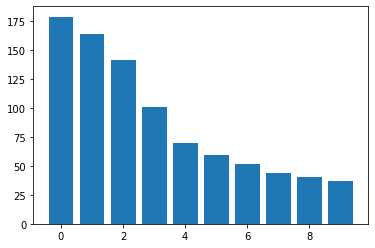

In [72]:
plt.bar(np.arange(10), pca.explained_variance_)
plt.show()

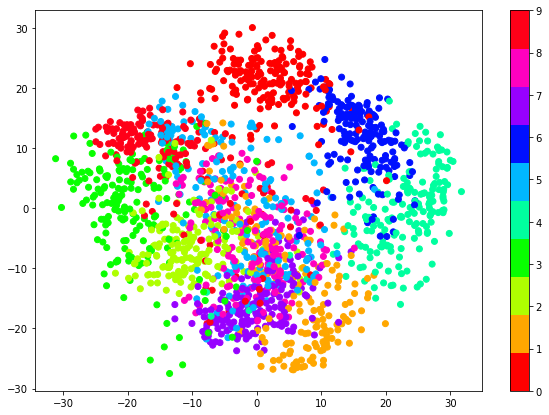

In [73]:
plt.figure(figsize=(10, 7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

Make the projection manually. What we need are basis vectors and mean shift:

In [74]:
pca.components_.shape, pca.mean_.shape

((10, 64), (64,))

Project on a subspace of principal components:

In [75]:
proj = np.dot(digits.data.astype(float) - pca.mean_, pca.components_.T)
proj.shape

(1797, 10)

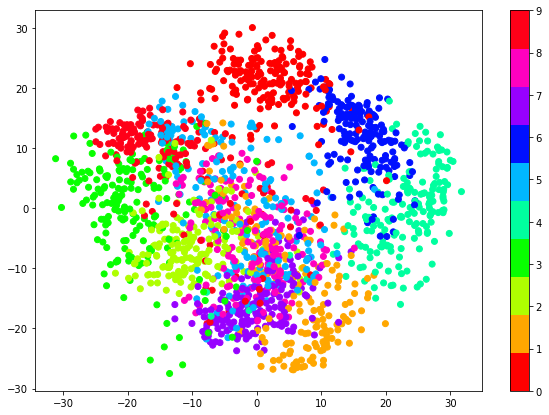

In [76]:
plt.figure(figsize=(10, 7))
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

We can plot in 3D:

<IPython.core.display.Javascript object>


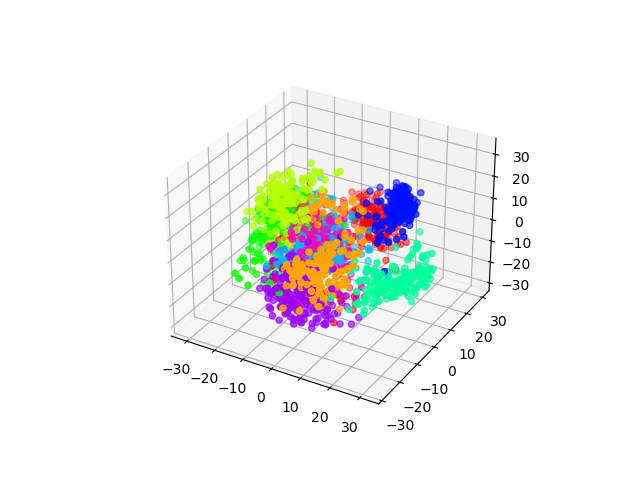

In [77]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X_transformed.T[:3], c=digits.target, cmap='hsv')
plt.show()

To what extent we can restore original data from principal components?

In [78]:
X_restored = pca.inverse_transform(X_transformed)
X_restored.shape

(1797, 64)

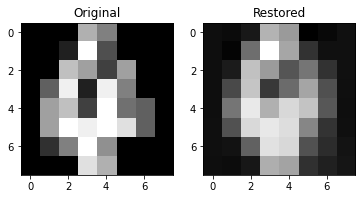

In [79]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Can you perform inverse transoformation explicitly?

In [80]:
res = np.dot(X_transformed, ???) + ???

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(res[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

SyntaxError: invalid syntax (<ipython-input-80-c6188a4658fa>, line 1)

Homework:

1. Complete all exersices with Lynx-Rabbits dataset.
2. Plot a graph of total explained variance vs number of principal components.
3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.
4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.
    
    Hint: download full-size 28x28 MNIST images to better see a difference between original and restored images

```python
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
```

![img](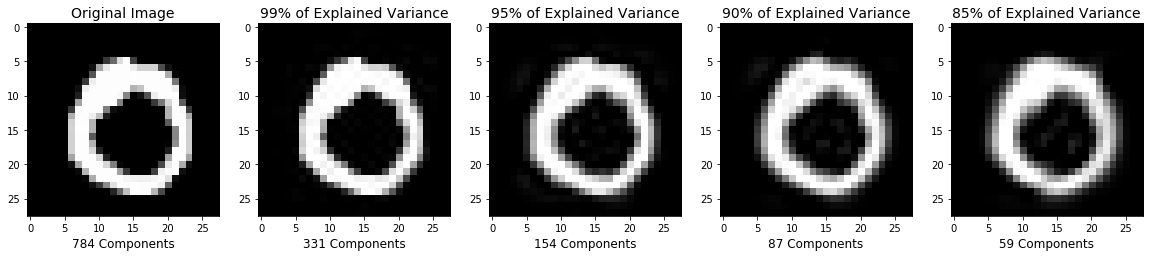%0A)

5*. Can you get a more insightful representation of MNIST dataset in 2D? For inspiration see https://colah.github.io/posts/2014-10-Visualizing-MNIST/